## Data Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('EtownQAData.csv', )

In [3]:
data.head()

,Question,Answer,Class,Long_Answer
0,When was Elizabethtown College first opened?,1899,1,Etown was first opened in 1899.
1,When was Etown opened?,1899,1,Etown was opened in 1899.
2,Who originally founded Elizabethtown College?,Reverend Jacob G. Francis in 1899,1,Etown was founded by Reverend Jacob G. Francis...
3,Who founded Etown?,Reverend Jacob G. Francis in 1899,1,Reverend Jacob G. Francis founded Etown in 1899.
4,When was Elizabethtown College originally foun...,1899,1,Etown was founded in 1899.


## Data Cleaning

In [4]:
import re
import string

In [5]:
def clean_text_round1(text):
    '''
    Make text lowercase, 
    remove text in square brackets, 
    remove punctuation and 
    remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [6]:
data['Question'] = data['Question'].apply(clean_text_round1)

data

,Question,Answer,Class,Long_Answer
0,when was elizabethtown college first opened,1899,1,Etown was first opened in 1899.
1,when was etown opened,1899,1,Etown was opened in 1899.
2,who originally founded elizabethtown college,Reverend Jacob G. Francis in 1899,1,Etown was founded by Reverend Jacob G. Francis...
3,who founded etown,Reverend Jacob G. Francis in 1899,1,Reverend Jacob G. Francis founded Etown in 1899.
4,when was elizabethtown college originally founded,1899,1,Etown was founded in 1899.
...,...,...,...,...
350,is elizabethtown college a college or a univer...,Elizabethtown College is a college,1,NaN
351,what year was elizabethtown college opened,1899,1,NaN
352,when was elizabethtown college officially opened,1899,1,NaN
353,what is the best thing elizabethtown college h...,The academics at Elizabethtown College are exc...,12,NaN


In [7]:
def clean_text_round2(text):
    '''
    Get rid of some additional punctuation and 
    non-sensical text that was missed the first time around.
    '''
    # These are not straigt quotes, to type them out, use
    # option+[], option+shift+[], option+;
    text = re.sub('[’‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

In [8]:
data['Question'] = data['Question'].apply(clean_text_round2)

data

,Question,Answer,Class,Long_Answer
0,when was elizabethtown college first opened,1899,1,Etown was first opened in 1899.
1,when was etown opened,1899,1,Etown was opened in 1899.
2,who originally founded elizabethtown college,Reverend Jacob G. Francis in 1899,1,Etown was founded by Reverend Jacob G. Francis...
3,who founded etown,Reverend Jacob G. Francis in 1899,1,Reverend Jacob G. Francis founded Etown in 1899.
4,when was elizabethtown college originally founded,1899,1,Etown was founded in 1899.
...,...,...,...,...
350,is elizabethtown college a college or a univer...,Elizabethtown College is a college,1,NaN
351,what year was elizabethtown college opened,1899,1,NaN
352,when was elizabethtown college officially opened,1899,1,NaN
353,what is the best thing elizabethtown college h...,The academics at Elizabethtown College are exc...,12,NaN


In [9]:
import nltk
from nltk.corpus import stopwords

In [10]:
# Download necessary nltk resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/grohotolskim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/grohotolskim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
stop_words = list(stopwords.words('english')) 

stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
# Add our own stop words

stop_words.append('elizabethtown')
stop_words.append('college')
stop_words.append('etown')

stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
from nltk.tokenize import word_tokenize

In [14]:
def remove_stop_words(sent):
    words = word_tokenize(sent)
    sent = ' '.join(str(j) for j in words if j not in stop_words and (len(j) != 1))
    
    return sent

In [15]:
data['Question'] = data['Question'].apply(remove_stop_words)

data

,Question,Answer,Class,Long_Answer
0,first opened,1899,1,Etown was first opened in 1899.
1,opened,1899,1,Etown was opened in 1899.
2,originally founded,Reverend Jacob G. Francis in 1899,1,Etown was founded by Reverend Jacob G. Francis...
3,founded,Reverend Jacob G. Francis in 1899,1,Reverend Jacob G. Francis founded Etown in 1899.
4,originally founded,1899,1,Etown was founded in 1899.
...,...,...,...,...
350,university,Elizabethtown College is a college,1,NaN
351,year opened,1899,1,NaN
352,officially opened,1899,1,NaN
353,best thing offer,The academics at Elizabethtown College are exc...,12,NaN


In [16]:
import itertools

In [17]:
df = pd.DataFrame(list(itertools.combinations(data['Question'], 2)))

df

,0,1
0,first opened,opened
1,first opened,originally founded
2,first opened,founded
3,first opened,originally founded
4,first opened,founded
...,...,...
62830,year opened,best thing offer
62831,year opened,part pennsylvania
62832,officially opened,best thing offer
62833,officially opened,part pennsylvania


## EDA
Let's check what our training data looks like with a count plot of words

In [28]:
words = []

def add_words(sent):
    for i in sent.split(): words.append(i)
    
data['Question'].apply(add_words)

0      None
1      None
2      None
3      None
4      None
       ... 
350    None
351    None
352    None
353    None
354    None
Name: Question, Length: 355, dtype: object

In [33]:
words_df = pd.DataFrame(words)

words_df

,0
0,first
1,opened
2,opened
3,originally
4,founded
...,...
914,best
915,thing
916,offer
917,part


<AxesSubplot:xlabel='0', ylabel='count'>

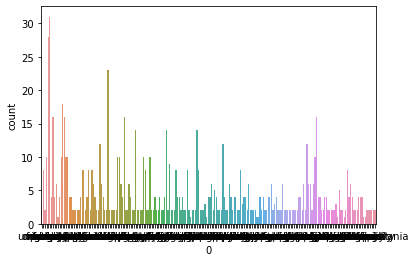

In [38]:
sns.countplot(data=words_df, x=0)

The counts do not seem to be drastically biased

## Data Exportation

In [40]:
df.to_pickle('question_pairs.pkl')